In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

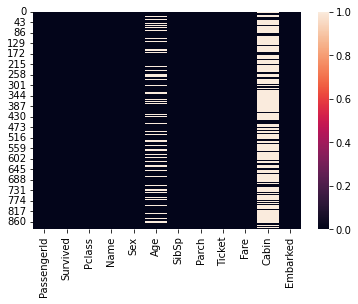

In [4]:
sns.heatmap(df.isnull())
plt.show()

In [5]:
df.shape

(891, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
65,66,1,3,"Moubarek, Master. Gerios",male,NaN,1,1,2661,15.2458,NaN,C


In [8]:
#to remove unwanted column from dataset
df.drop('Cabin',axis=1,inplace=True)

In [9]:
#to remove unwanted column from dataset
df.drop('Embarked',axis=1,inplace=True)

In [10]:
df['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [11]:
#fill the null values of Age column with mean of rating permanently
#1st find the mean
m=df['Age'].mean()
df['Age'].fillna(m,inplace=True)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
dtype: int64

In [12]:
#to convert datatype of Age column from float to int permanently
df['Age']=df['Age'].astype('int')

In [14]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age              int32
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
dtype: object

In [15]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
dtype: int64

In [16]:
df.duplicated().sum()

0

In [17]:
#Seperate Dataset df into 2 parts: 1. df_cat and df_num
df_cat=df.select_dtypes(object)
df_num=df.select_dtypes(['float', 'int'])

In [18]:
#apply label encoder on df_cat
from sklearn.preprocessing import LabelEncoder
column=df_cat.columns
for col in column:
    #create object of label encoder class
    le=LabelEncoder()
    df_cat[col]=le.fit_transform(df_cat[col])

In [19]:
df_cat.head()

,Name,Sex,Ticket
0,108,1,523
1,190,0,596
2,353,0,669
3,272,0,49
4,15,1,472


In [20]:
#concat of df_num and df_cat and hold in new dataframe df_new
df_new= pd.concat([df_num, df_cat], axis=1)
df_new.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Name,Sex,Ticket
0,1,0,3,22,1,0,7.2500,108,1,523
1,2,1,1,38,1,0,71.2833,190,0,596
2,3,1,3,26,0,0,7.9250,353,0,669
3,4,1,1,35,1,0,53.1000,272,0,49
4,5,0,3,35,0,0,8.0500,15,1,472


In [22]:
df_new['Survived'].unique()

array([0, 1], dtype=int64)

In [23]:
df_new['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

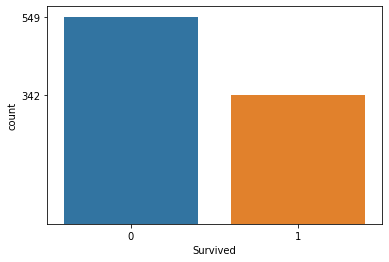

In [24]:
# Visualize
sns.countplot(data=df_new,x='Survived')
f=df_new['Survived'].value_counts()
plt.yticks(f)
plt.show()

In [25]:
#Here clear understand : data is imbalance : -
#We have to balance dataset 
#Sampling Technique : -
#classification algorithm 
#Data Imbalance : - we handle imbalance data , we take some sampling technique.
#There are 2 types of sampling technique :-
#1. Random Over sampling tech. 
#2. Random under sampling tech.
'''
If you have basically reducing the majority class that is known as under 
sampling
if you are increasing the minority class that is known as over sampling .

'''

'\nIf you have basically reducing the majority class that is known as under \nsampling\nif you are increasing the minority class that is known as over sampling .\n\n'

In [26]:
#select input and output
X=df_new.drop('Survived', axis=1)
Y=df_new['Survived']


In [27]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size=0.3, random_state=1)

In [28]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [29]:
#First we will use RandomOverSampler to balance dataset
from imblearn.over_sampling import RandomOverSampler

In [30]:
X_train.shape, Y_train.shape

((623, 9), (623,))

In [31]:
Y_train.value_counts()

0    396
1    227
Name: Survived, dtype: int64

In [32]:
#to convert minority class (1) into majority class (0)
ros= RandomOverSampler(random_state=1)

In [33]:
#apply over sampler on training data
X_train_ros, Y_train_ros=ros.fit_resample(X_train, Y_train)

In [34]:
Y_train_ros.value_counts()

0    396
1    396
Name: Survived, dtype: int64

In [35]:
#similarly apply over sampler on testing data
Y_test.value_counts()

0    153
1    115
Name: Survived, dtype: int64

In [36]:
X_test_ros, Y_test_ros=ros.fit_resample(X_test, Y_test)

In [37]:
Y_test_ros.value_counts()

1    153
0    153
Name: Survived, dtype: int64

In [38]:
#create a function
def create_model(model):          #model user defined which holds the object of algo
    #train the model
    model.fit(X_train,Y_train)
    #test the model
    Y_pred=model.predict(X_test)
    #Generate report
    print(classification_report(Y_test,Y_pred))
    print(confusion_matrix(Y_test,Y_pred))
    return model

In [39]:
#First we will create a Logistic Regression model of Classification
from sklearn.linear_model import LogisticRegression

In [42]:
lr=LogisticRegression()

In [43]:
from sklearn.metrics import classification_report, confusion_matrix

In [44]:
#Logistic Regression model
lr=create_model(lr)

              precision    recall  f1-score   support

           0       0.78      0.83      0.81       153
           1       0.75      0.70      0.72       115

    accuracy                           0.77       268
   macro avg       0.77      0.76      0.77       268
weighted avg       0.77      0.77      0.77       268

[[127  26]
 [ 35  80]]


In [45]:
#Here the score is good but not the best
#We will use Decision tree classifier to help select important features with the help of Entropy and Gini index

In [46]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
dt=DecisionTreeClassifier(random_state=1)

In [48]:
#call function create_model() and pass the parameter: object of DT
#DT model without pruning
dt=create_model(dt)

              precision    recall  f1-score   support

           0       0.73      0.80      0.76       153
           1       0.69      0.61      0.65       115

    accuracy                           0.72       268
   macro avg       0.71      0.70      0.71       268
weighted avg       0.71      0.72      0.71       268

[[122  31]
 [ 45  70]]


In [49]:
d={'Input': X.columns, 'IG': dt.feature_importances_}
F=pd.DataFrame(d)
F.sort_values('IG', ascending=False, ignore_index=True)

,Input,IG
0,Sex,0.321008
1,Name,0.137857
2,Ticket,0.109188
3,PassengerId,0.103640
4,Pclass,0.101645
5,Age,0.097525
6,Fare,0.079765
7,SibSp,0.040613
8,Parch,0.008759


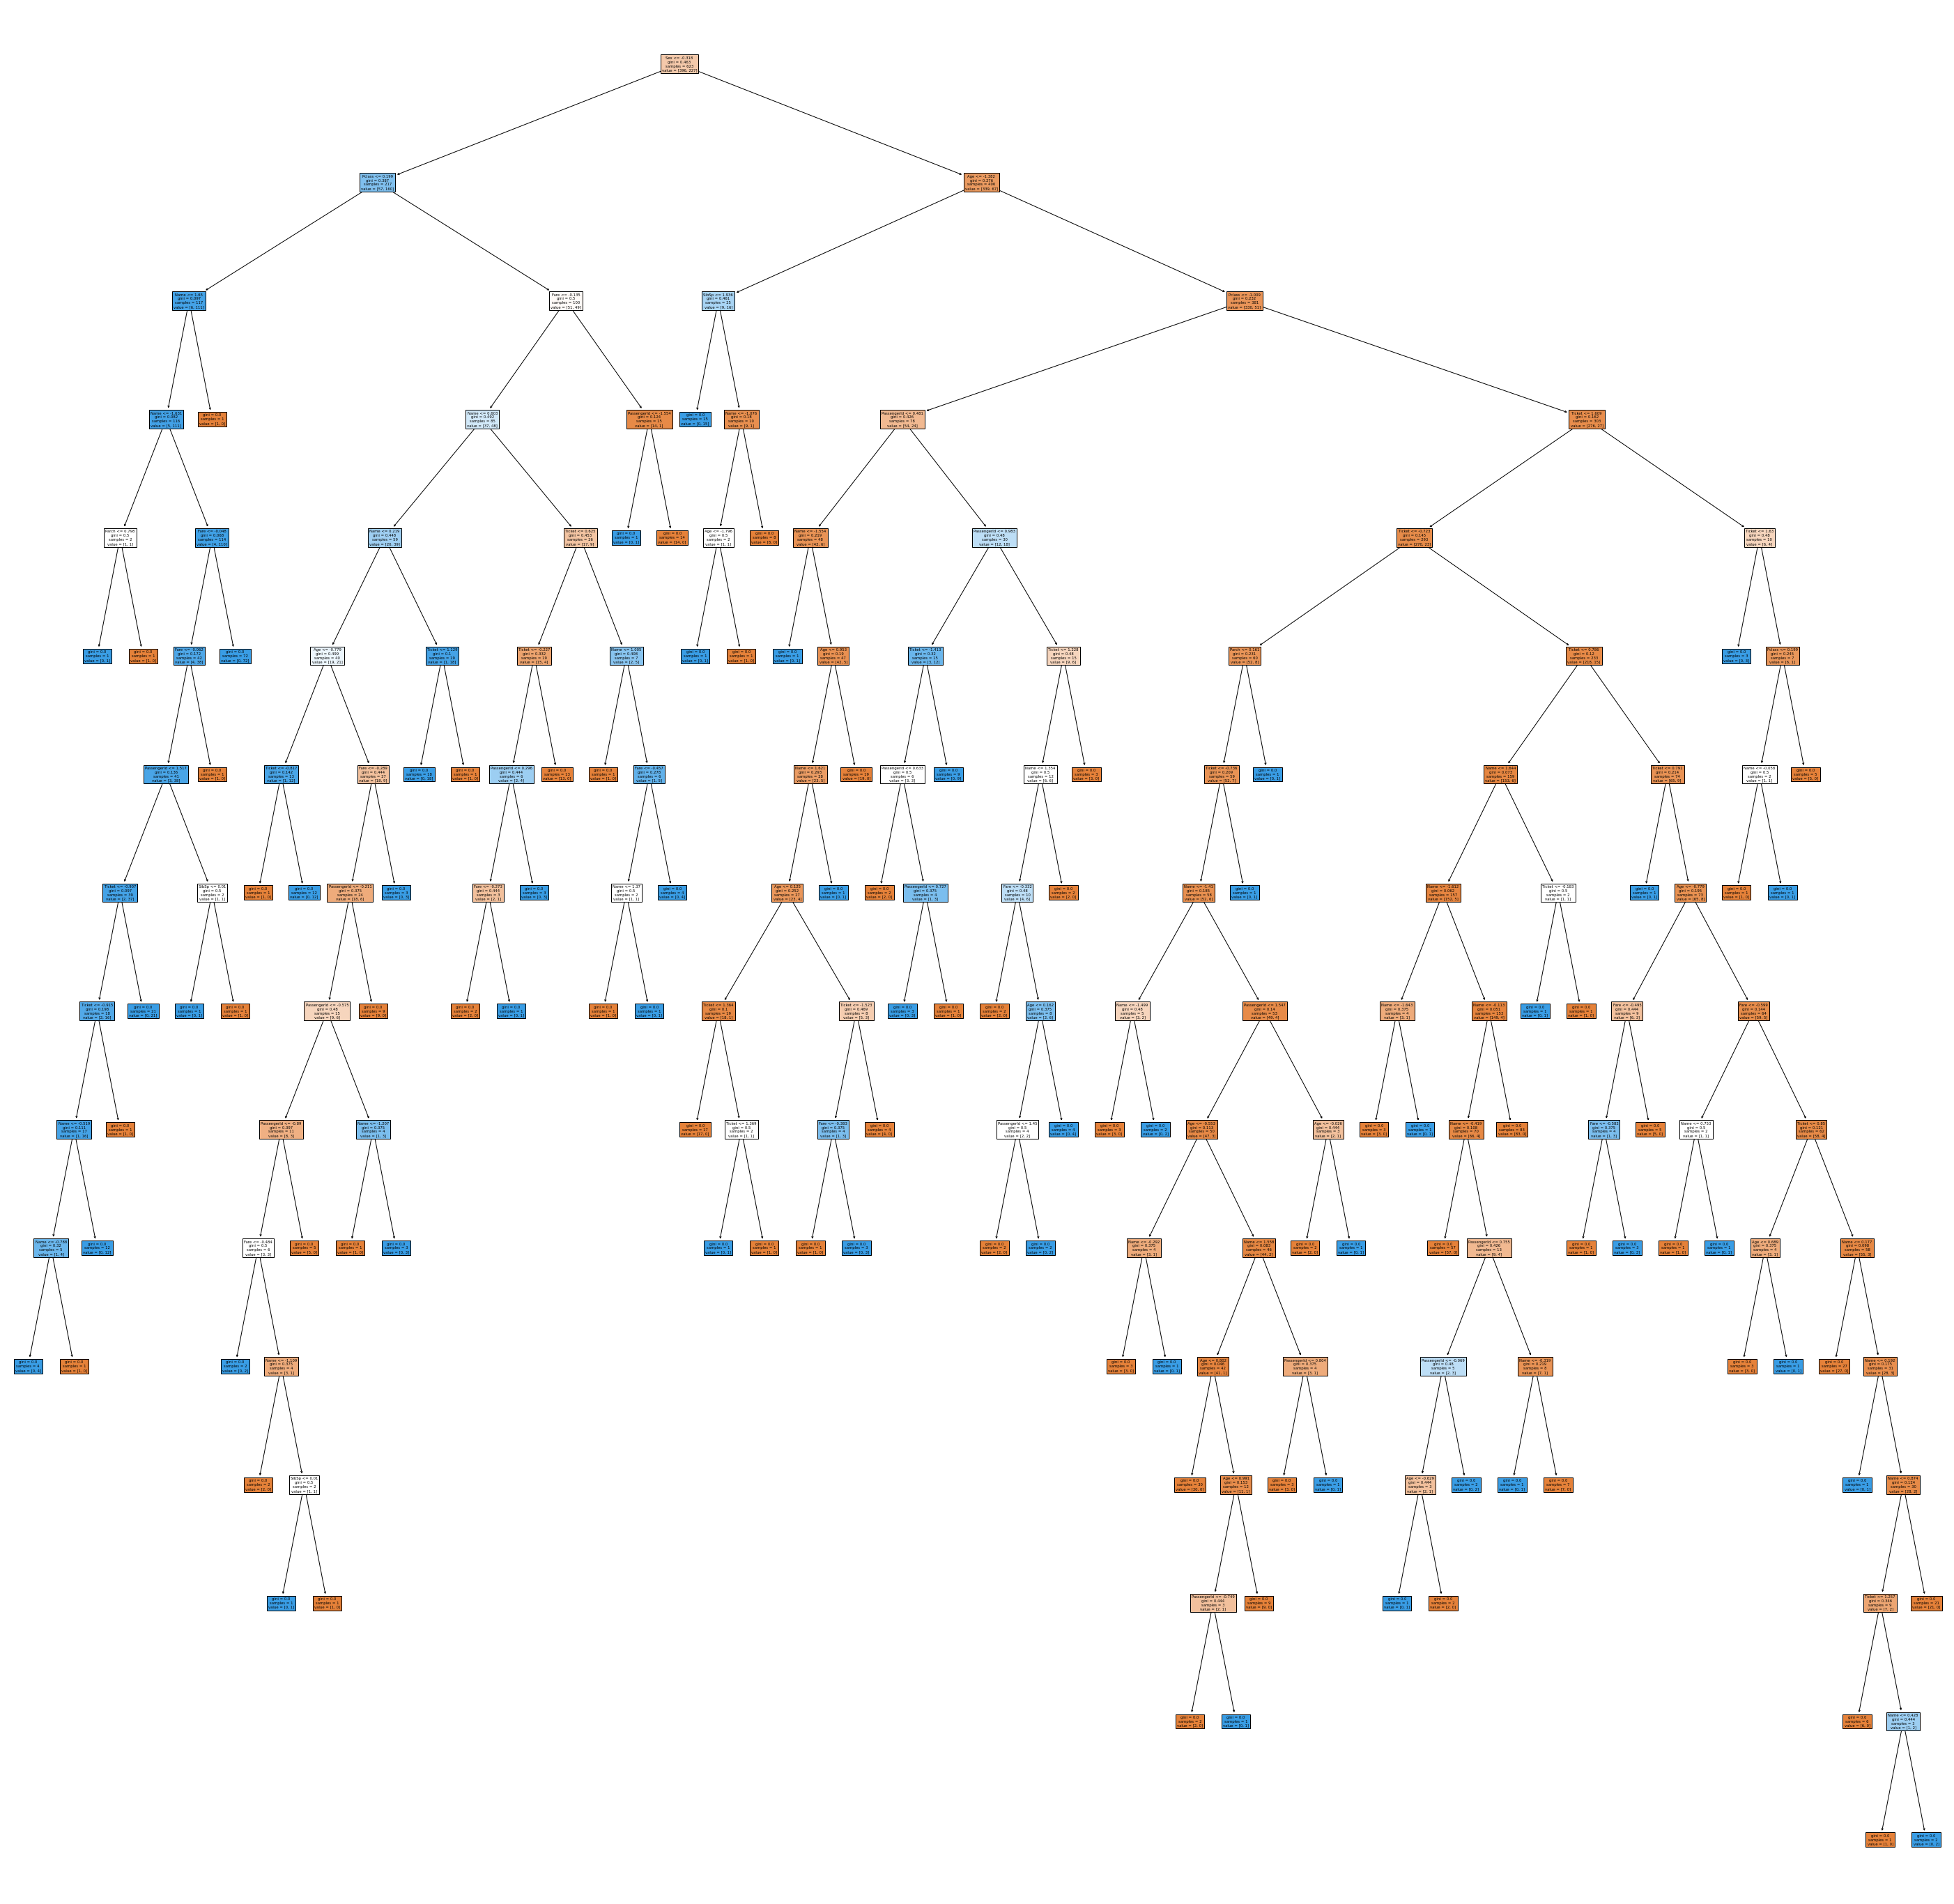

In [50]:
#create a tree
from sklearn import tree
features = X.columns
plt.figure(figsize=(50,50))
_=tree.plot_tree(dt,feature_names=features,filled=True)

In [51]:
#But we got less score 0.61 which is bad , 
#reason behind low score is possibly overfitting
#model is overfit so we will try to reduce the overfitting situation : - 
#we will use pruning techniques

#How to reduced a overfitting situation By using the Pruning technique : -
#There are 2 types of pruning technique : -
#1. max_depth : inbulit parameter
#2. min_samples_leaf  : inbuilt parameter

In [52]:
##create object of DecisionTreeClassifier class and passing the parameter(Pruning)
#max_depth

dt1=DecisionTreeClassifier(random_state=1, max_depth=8) #by Default gini index

In [53]:
#DT model with pruning max_depth
dt1=create_model(dt1)

              precision    recall  f1-score   support

           0       0.74      0.86      0.79       153
           1       0.76      0.59      0.66       115

    accuracy                           0.74       268
   macro avg       0.75      0.72      0.73       268
weighted avg       0.74      0.74      0.74       268

[[131  22]
 [ 47  68]]


In [54]:
#we can see that the recall score has reduced further to 0.59 from 0.61
# we will use different values of max_depth to try and increase score

In [77]:
#check with different values of max_depth unntil we can find the best score and solve overfitting
dt2=DecisionTreeClassifier(random_state=1, max_depth=5) #by Default gini index

In [76]:
#DT model with pruning max_depth
dt2=create_model(dt2)

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       153
           1       0.80      0.64      0.71       115

    accuracy                           0.78       268
   macro avg       0.78      0.76      0.76       268
weighted avg       0.78      0.78      0.77       268

[[134  19]
 [ 41  74]]


In [ ]:
#After applying various max_depth values we found that the model is underfit and not overfit.
#Data lacks necessary important columns and values which would help make the prediction
#The best recall score we could find was with max_depth value as 5 as we can see above.